# Problem:
### Prediction of individual medical costs billed by health insurance using several features (age, bmi, region, ...)
### So we will use Multivariate Linear Regression not the Univariate.

# General Packages Used

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# General Functions Used

In [156]:
# Function for scaling data
def Standard_Scaler (data, col_names):
    features = data[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    data[col_names] = features
    
    return data

In [157]:
# Function to make standardization for the data
def Standardization(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    x_standardized = ((x - mean) / std)
    
    return x_standardized

## Data Pre-processing

### Read CSV file

In [158]:
df = pd.read_csv('insurance.csv')

In [159]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [160]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Check for any missing value

In [162]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Preparation

### Functions

In [163]:
# Function to get the outliers of the given data using Z score.
def zScoreOutliers(data):
    outliers = []

    # Set the threshold which we will use
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    # Calculate the Z score using this formula
    z_score= (data - mean)/std

    # Search for the outliers
    for i in data:
        z_score = (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [164]:
# Function to get the outliers of the given data using IQR (Inter Quantile Range).
def iqrOutliers(data):
    outliers2 = []
    sorted_list = sorted(data)
    quantile1, quantile3 = np.percentile(sorted_list, [25,75])
    iqr_value = quantile3-quantile1
    lower_bound_val = quantile1 - (1.5 * iqr_value) 
    upper_bound_val = quantile3 + (1.5 * iqr_value)

    for i in data:
        if i < lower_bound_val or i > upper_bound_val:
            outliers2.append(i)          
    return outliers2

In [165]:
age_outliers = zScoreOutliers(df["age"])
age_outliers

[]

In [166]:
age_outliers_2 = iqrOutliers(df['age'])
age_outliers_2

[]

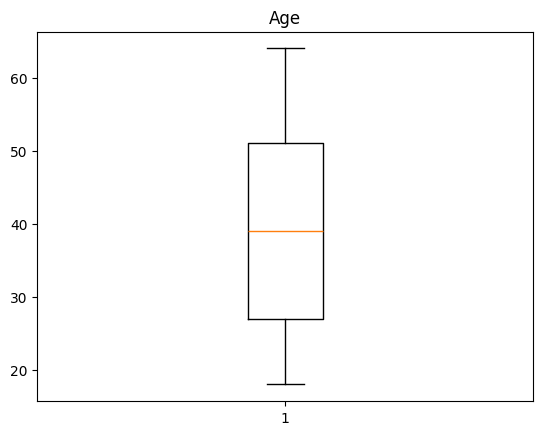

In [167]:
plt.boxplot(df['age'])
plt.title("Age")
plt.show()

In [168]:
bmi_outliers = zScoreOutliers(df["bmi"])
bmi_outliers

[49.06, 50.38, 52.58, 53.13]

In [169]:
age_outliers_2 = iqrOutliers(df['bmi'])
age_outliers_2

[49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]

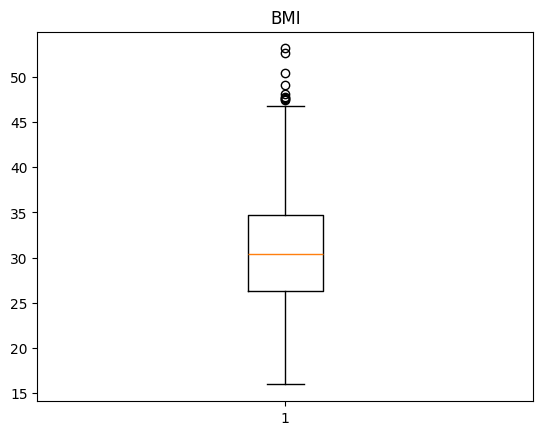

In [170]:
plt.boxplot(df['bmi'])
plt.title("BMI")
plt.show()

###  Exploratory Data Analysis (EDA)

#### Visualizing the categorical features

Text(0, 0.5, 'Amount')

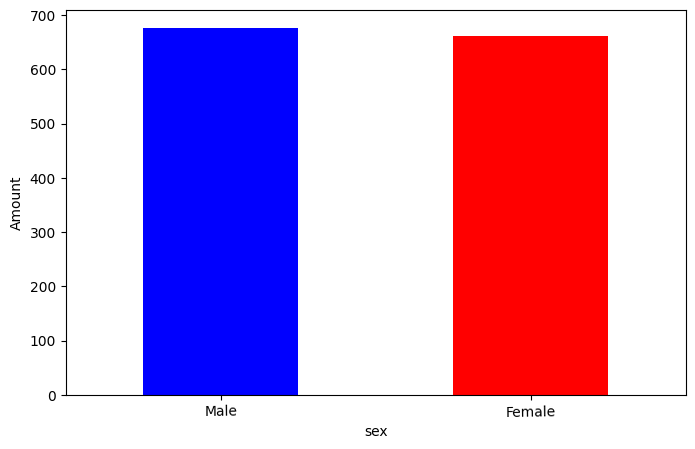

In [174]:
# Plotting bar chart of SEX feature
plt.figure(figsize=(8,5))
fig = df.sex.value_counts().plot(kind = 'bar', color=['blue','red'])
fig.set_xticklabels(labels = ['Male','Female'], rotation=0.9);
plt.ylabel("Amount")

<Axes: ylabel='count'>

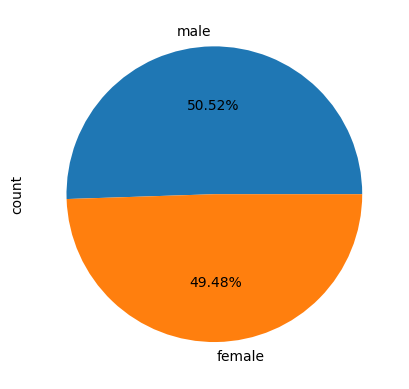

In [175]:
df['sex'].value_counts().plot(kind="pie", autopct="%1.2f%%")

Text(0, 0.5, 'Amount')

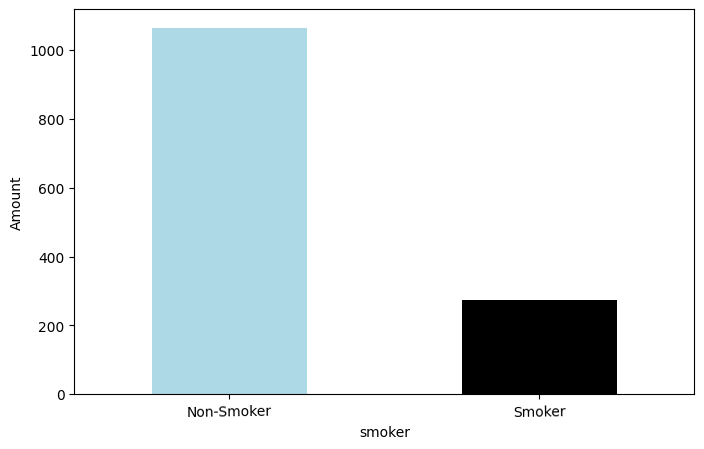

In [176]:
# Plotting bar chart Smoking feature
plt.figure(figsize=(8,5))
fig = df.smoker.value_counts().plot(kind = 'bar', color=['lightblue','black'])
fig.set_xticklabels(labels = ['Non-Smoker','Smoker'], rotation=0.9);
plt.ylabel("Amount")

<Axes: ylabel='count'>

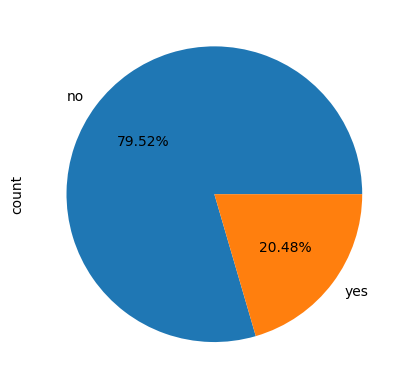

In [177]:
df['smoker'].value_counts().plot(kind="pie", autopct="%1.2f%%")

Text(0, 0.5, 'Amount')

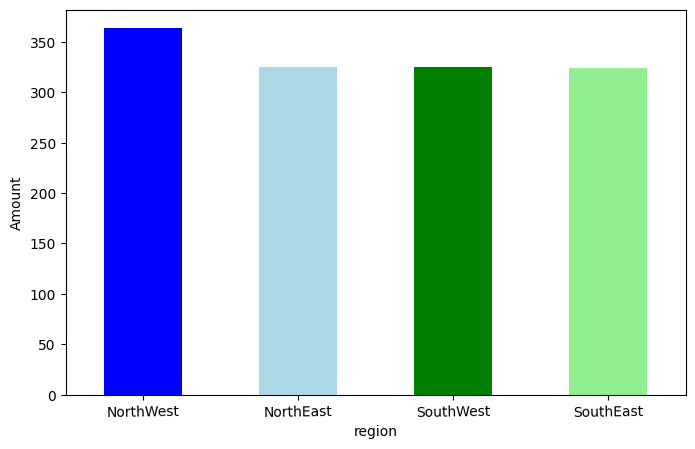

In [178]:
# Plotting bar chart region feature
plt.figure(figsize=(8,5))
fig = df.region.value_counts().plot(kind = 'bar', color=['blue', 'lightblue', 'green', 'lightgreen'])
fig.set_xticklabels(labels = ['NorthWest', 'NorthEast', 'SouthWest', 'SouthEast'], rotation=0.9);
plt.ylabel("Amount")

<Axes: xlabel='smoker', ylabel='charges'>

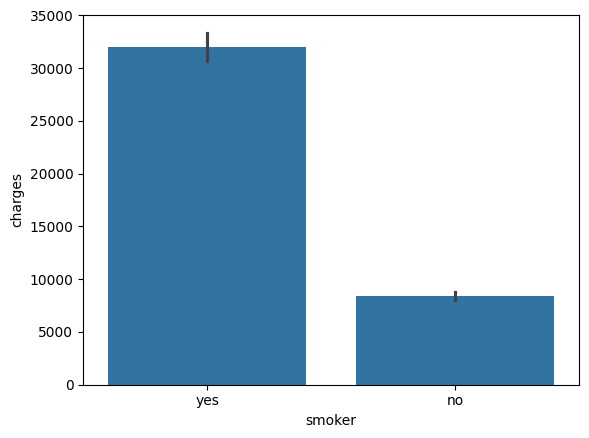

In [179]:
sns.barplot(x=df['smoker'], y=df['charges'])

<Axes: xlabel='children', ylabel='charges'>

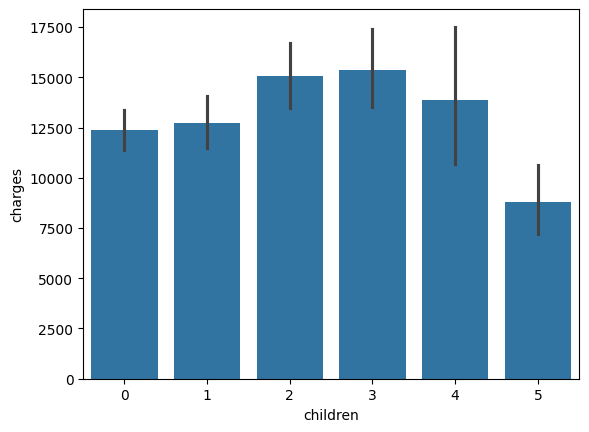

In [180]:
sns.barplot(x = df['children'], y = df['charges'])

#### Visualizing features vs charges

Text(0, 0.5, 'Charges')

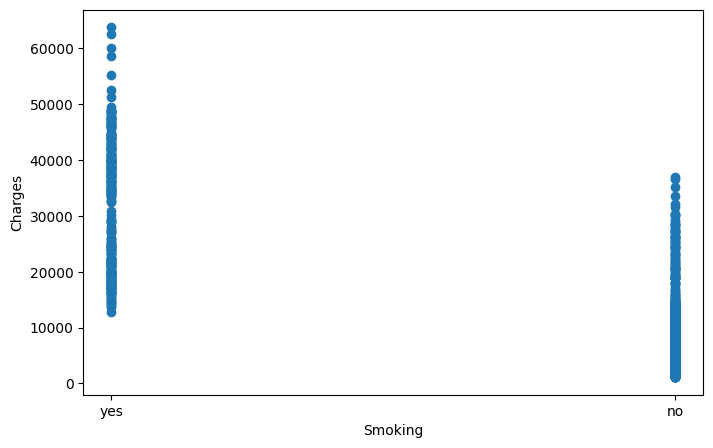

In [181]:
plt.figure(figsize=(8,5))
plt.scatter(x=df['smoker'] , y=df['charges'])
plt.xlabel('Smoking')
plt.ylabel('Charges')

Text(0, 0.5, 'Charges')

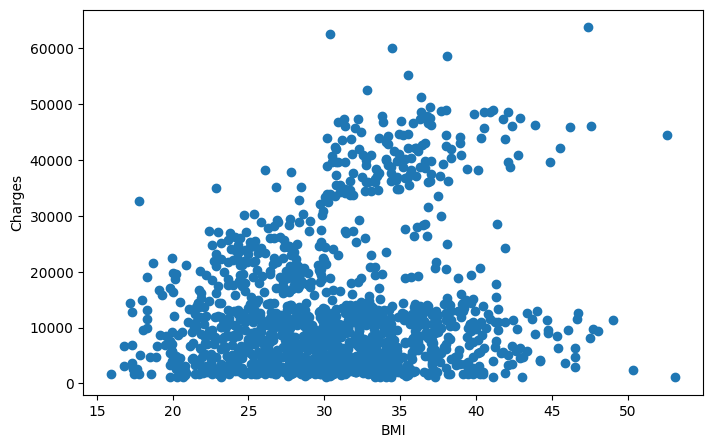

In [182]:
plt.figure(figsize=(8,5))
plt.scatter(x=df['bmi'] , y=df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')

Text(0, 0.5, 'Charges')

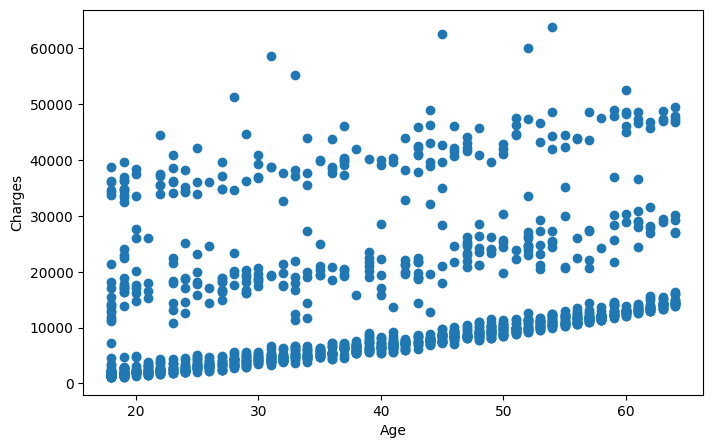

In [183]:
plt.figure(figsize=(8,5))
plt.scatter(x=df['age'] , y=df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')

#### Change categorical data into integral by mapping

In [184]:
df['sex'] = df['sex'].map({'male':0 , 'female':1})
df['smoker'] = df['smoker'].map({'no':0 , 'yes':1})
df['region'] = df['region'].map({'northwest':0 , 'northeast':1 ,'southwest':2 ,'southeast':3})

In [185]:
# Check for the datatypes in the dataframe
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

### Correlation Matrix
#### Shows the amount of each feature participation to the output. (range: 0 -> 1) (The more greater the more better)

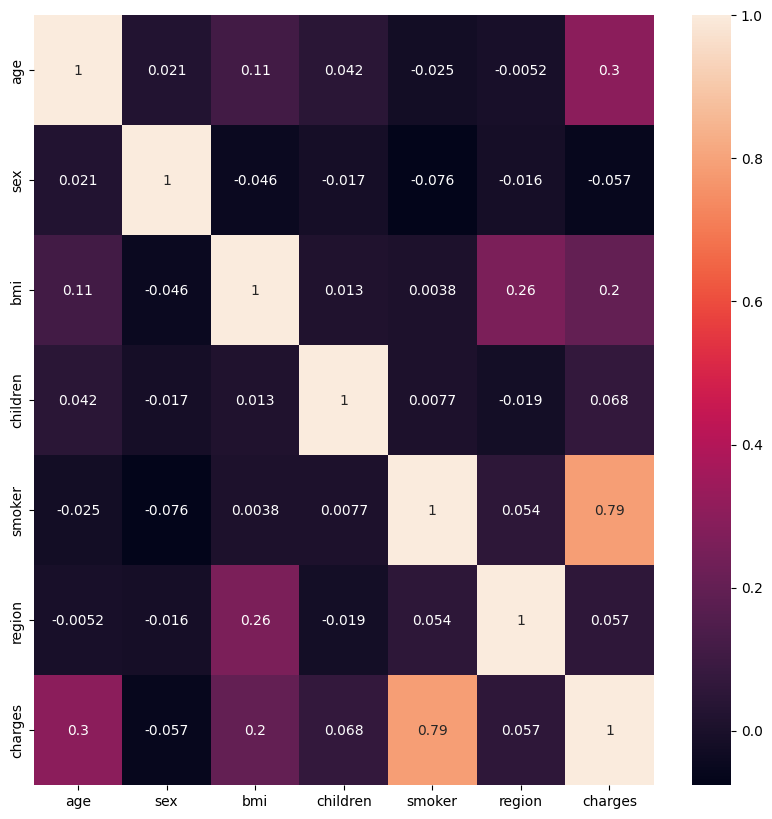

In [186]:
corr_matrix = df.corr()
plt.figure(figsize = (10,10))
sns_plot = sns.heatmap(corr_matrix, annot=True)

### We can see that there are 3 features that are near to 0.1 which are bmi, smoker and age

In [187]:
X = df.drop( 'charges' , axis = 1)
y = df[ ['charges'] ]

### Feature Scaling

In [188]:
# Using my impelmented function
X_stand = Standardization(X)
y_stand = Standardization(y)

In [189]:
# Using Sklearn function
X = Standard_Scaler(X, X.columns)
y = Standard_Scaler(y, y.columns)

C:\Users\Misara\AppData\Local\Temp\ipykernel_6392\2499910867.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_names] = features


### Compare between my and Sklearn standardization function

In [190]:
X_stand

,age,sex,bmi,children,smoker,region
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,0.403289
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,1.287881
2,-0.797954,-0.989591,0.383307,1.580926,-0.507463,1.287881
3,-0.441948,-0.989591,-1.305531,-0.908614,-0.507463,-1.365894
4,-0.513149,-0.989591,-0.292556,-0.908614,-0.507463,-1.365894
...,...,...,...,...,...,...
1333,0.768473,-0.989591,0.050297,1.580926,-0.507463,-1.365894
1334,-1.509965,1.010519,0.206139,-0.908614,-0.507463,-0.481303
1335,-1.509965,1.010519,1.014878,-0.908614,-0.507463,1.287881
1336,-1.296362,1.010519,-0.797813,-0.908614,-0.507463,0.403289


In [191]:
X

,age,sex,bmi,children,smoker,region
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,0.403289
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,1.287881
2,-0.797954,-0.989591,0.383307,1.580926,-0.507463,1.287881
3,-0.441948,-0.989591,-1.305531,-0.908614,-0.507463,-1.365894
4,-0.513149,-0.989591,-0.292556,-0.908614,-0.507463,-1.365894
...,...,...,...,...,...,...
1333,0.768473,-0.989591,0.050297,1.580926,-0.507463,-1.365894
1334,-1.509965,1.010519,0.206139,-0.908614,-0.507463,-0.481303
1335,-1.509965,1.010519,1.014878,-0.908614,-0.507463,1.287881
1336,-1.296362,1.010519,-0.797813,-0.908614,-0.507463,0.403289


In [192]:
y_stand

,charges
0,0.298584
1,-0.953689
2,-0.728675
3,0.719843
4,-0.776802
...,...
1333,-0.220551
1334,-0.914002
1335,-0.961596
1336,-0.930362


In [193]:
y

,charges
0,0.298584
1,-0.953689
2,-0.728675
3,0.719843
4,-0.776802
...,...
1333,-0.220551
1334,-0.914002
1335,-0.961596
1336,-0.930362


##### Change to numpy array

In [194]:
X = X.to_numpy()
y = y.to_numpy()

In [195]:
X_stand = X_stand.to_numpy()
y_stand = y_stand.to_numpy()

# From scratch implementation

### Model Functions 

In [196]:
def linearRegression(X, y, itr, L_rate):

    # Get the number of features and the number of samples
    no_instances, no_features = X.shape
    
    # Initialize the weights and bias
    b = 0
    w = np.zeros( (no_features,1) )
    
    # Loop with the number of iterations
    for i in range(itr):
        
        # Calculate y predicted
        y_pred = np.dot(X , w) + b

        # Calculate gradient for the bias and weights
        b_grad = 2/no_instances * np.sum( (y_pred - y) )
        w_grad = 2/no_instances * np.dot( X.T , (y_pred - y) )

        # Update the bias and weights using the gradient and learning rate
        b = b - b_grad * L_rate
        w = w - w_grad.reshape(-1,1) * L_rate

    # Return the final bias and weights
    return b , w

In [197]:
def predict(x, b, w):
    return(np.dot(x,w) + b)

### Evaluation Functions

In [198]:
# Function to calculate the mean squared error
def MSE(y, y_pred):
    return( np.mean((y - y_pred)**2) )

In [199]:
# Function to calculate Coefficient of Determination 𝑹2
def r2Score(y, y_pred):
    y_mean = np.mean(y)
    ssr = np.sum( (y_pred - y)**2 )
    sst = np.sum( (y - y_mean)**2 )
    score = 1 - (ssr/sst)
    return score

### Fitting & Predicting & Evaluating the model

In [200]:
learning_rate = 0.1
iterations = 1000

In [201]:
# Fitting
final_bias, final_weights = linearRegression(X, y, iterations, learning_rate)

In [202]:
# Predicting
predictions = predict(X, final_bias, final_weights)

In [203]:
# Evaluating
print("All features MSE: ", MSE(y, predictions))
print("All features R2: ", r2Score(y, predictions))

All features MSE:  0.24956029662802598
All features R2:  0.750439703371974


# Sklearn model

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

### Normal train-test-split model (All features)

In [211]:
# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)

# Get the accuracy of the model
LR_score = LR_model.score(X_test, y_test)

In [212]:
print("Accuracy obtained by Logistic Regression model: ",LR_score*100)

Accuracy obtained by Logistic Regression model:  73.99304432013436


### Cross validation model (All features)

#### Cross validation is a technique to divide the data in uniform defined number of parts. Then use these parts as a test, so it make model for each part as a test
#### This technique is better than the normal test-train

In [207]:
# Number of folds is 10
k_folds = KFold(n_splits = 10)

# Get the scores for the 10 models
cross_model_scores = cross_val_score(LR_model, X, y, cv = k_folds)

In [208]:
print("Cross Validation Scores: ", (cross_model_scores*100) )
print("Average CV Score: ", round((cross_model_scores.mean()*100),2) )

Cross Validation Scores:  [78.59799461 73.4405885  73.75079166 66.74001063 77.00222476 78.42507079
 79.12103408 66.82215546 74.31408068 76.44351688]
Average CV Score:  74.47
